In [1]:
from sympy import *
from sympy.physics.mechanics import *

import numpy as np
from scipy.integrate import odeint

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

plt.rcParams['animation.ffmpeg_path'] = 'C:\ffmpeg\ffmpeg-2024-11-13-git-322b240cea-full_build\bin'

init_vprinting()

In [2]:
m, g, ell, t = symbols('m g ell t')
theta, phi = dynamicsymbols('theta phi')

xm = ell*sin(theta)*cos(phi)
ym = ell*sin(theta)*sin(phi)
zm = -ell*cos(theta)

xm_dot = diff(xm, t)
ym_dot = diff(ym, t)
zm_dot = diff(zm, t)

theta_dot = diff(theta, t)
theta_ddot = diff(theta_dot, t)

phi_dot = diff(phi, t)
phi_ddot = diff(phi_dot, t)


K = 0.5*m*(xm_dot**2 + ym_dot**2 + zm_dot**2)
P = m*g*zm
L = K - P
L

In [3]:
x1_f = lambdify((theta, phi, ell), xm)
y1_f = lambdify((theta, phi, ell), ym)
z1_f = lambdify((theta, phi, ell), zm)

In [4]:
#Euler-Lagrange equation
eqn = diff(diff(L, theta_dot), t) - diff(L, theta)
eqn2 = diff(diff(L, phi_dot), t) - diff(L, phi)
sln = solve([eqn, eqn2], (theta_ddot, phi_ddot), simplify=True, rational=False)
Eq(Matrix([theta_ddot, phi_ddot]), Matrix([sln[theta_ddot], sln[phi_ddot]]))


      ⎡    ⎛            2    ⎞       ⎤
      ⎢1.0⋅⎝ell⋅cos(θ)⋅φ̇  - g⎠⋅sin(θ)⎥
      ⎢──────────────────────────────⎥
⎡θ̈⎤   ⎢             ell              ⎥
⎢ ⎥ = ⎢                              ⎥
⎣φ̈⎦   ⎢           -2⋅φ̇⋅θ̇             ⎥
      ⎢           ───────            ⎥
      ⎣            tan(θ)            ⎦

In [5]:
x = Matrix([theta, theta_dot, phi, phi_dot])
x_dot = diff(x, t)
Eq(x_dot, Matrix([theta_dot, sln[theta_ddot], phi_dot, sln[phi_ddot]]))

      ⎡              θ̇               ⎤
      ⎢                              ⎥
      ⎢    ⎛            2    ⎞       ⎥
⎡θ̇⎤   ⎢1.0⋅⎝ell⋅cos(θ)⋅φ̇  - g⎠⋅sin(θ)⎥
⎢ ⎥   ⎢──────────────────────────────⎥
⎢θ̈⎥   ⎢             ell              ⎥
⎢ ⎥ = ⎢                              ⎥
⎢φ̇⎥   ⎢              φ̇               ⎥
⎢ ⎥   ⎢                              ⎥
⎣φ̈⎦   ⎢           -2⋅φ̇⋅θ̇             ⎥
      ⎢           ───────            ⎥
      ⎣            tan(θ)            ⎦

In [6]:
dx1dt_f = lambdify((t,g,m,ell,theta,phi,theta_dot,phi_dot), sln[theta_ddot])
dx3dt_f = lambdify((t,g,m, ell,theta,phi,theta_dot,phi_dot), sln[phi_ddot])
dthetadt_f = lambdify(theta_dot, theta_dot)
dphidt_f = lambdify(phi_dot, phi_dot)

In [7]:
def dSdt(S, t, g, m, L1):
    theta, phi, x1, x3 = S
    return [
        dthetadt_f(x1),
        dphidt_f(x3),
        dx1dt_f(t, g, m, L1, theta, phi, x1, x3),
        dx3dt_f(t, g, m, L1, theta, phi, x1, x3),
    ]

In [8]:
tend = 50
t = np.linspace(0, tend, tend*1000)
g = 9.81
m = 1.50
L1 = 10
ans = odeint(dSdt, y0=[np.pi/3, np.pi/3, 1, 2], t=t, args=(g,m,L1)) # non-zero phi, dtheta, dphi
ans2 = odeint(dSdt, y0=[np.pi/3, np.pi/3, 1, 0], t=t, args=(g,m,L1)) # non-zero dtheta, zero dphi
ans3 = odeint(dSdt, y0=[np.pi/3, np.pi/3, 0, 0], t=t, args=(g,m,L1)) #  zero dphi, dtheta

theta = ans.T[0]
phi = ans.T[1]
theta_deg = np.rad2deg(ans.T[0])
phi_deg = np.rad2deg(ans.T[1])


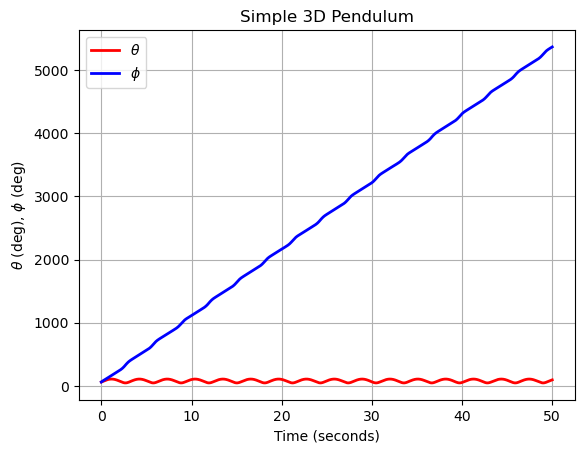

In [9]:
plt.plot(t,  theta_deg, 'r', lw=2, label=r'$\theta$')
plt.plot(t, phi_deg, 'b', lw=2, label=r'$ \phi$') 
plt.title('Simple 3D Pendulum')
plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel(r'$\theta$ (deg), $\phi$ (deg)')
plt.grid()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


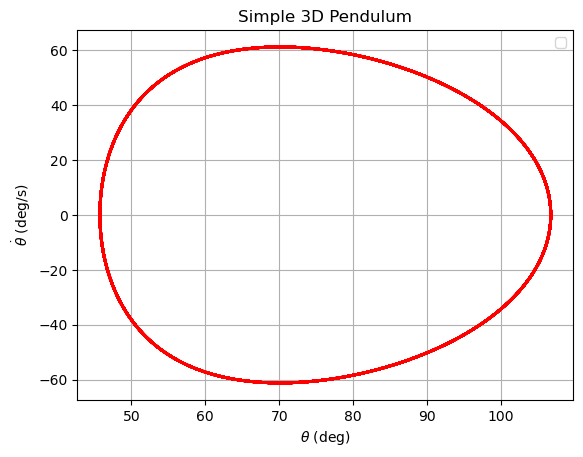

In [10]:
plt.plot(theta_deg,  ans.T[2]*180/np.pi, 'r', lw=2) #, label=r'$\ddot \theta$')
# plt.plot(t, ans.T[3]*180/np.pi, 'b', lw=2, label=r'$\ddot \phi$') 
plt.title('Simple 3D Pendulum')
plt.legend()
plt.xlabel(r'$ \theta$ (deg)')
plt.ylabel(r'$\dot \theta$ (deg/s)')
plt.grid()
plt.show()

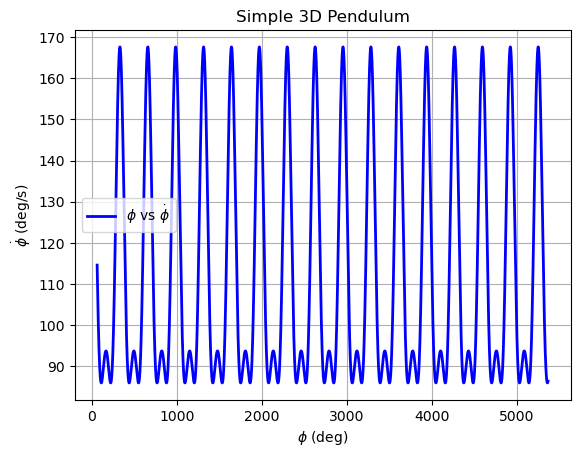

In [12]:
plt.plot(phi_deg,  ans.T[3]*180/np.pi, 'b', lw=2, label=r'$\phi$ vs $\dot \phi$')
# plt.plot(t, ans.T[3]*180/np.pi, 'b', lw=2, label=r'$\ddot \phi$') 
plt.title('Simple 3D Pendulum')
plt.legend()
plt.xlabel(r'$\phi$ (deg)')
plt.ylabel(r'$\dot \phi$ (deg/s)')
plt.grid()
plt.show()

In [50]:
theta = ans2.T[0]
phi = ans2.T[1]
theta_deg = np.rad2deg(ans2.T[0])
phi_deg = np.rad2deg(ans2.T[1])

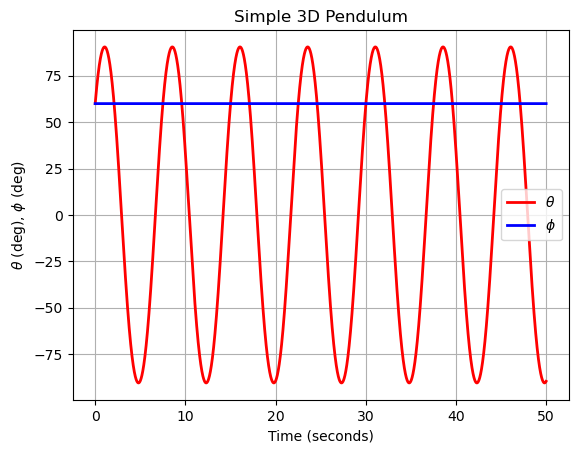

In [51]:
plt.plot(t,  theta_deg, 'r', lw=2, label=r'$\theta$')
plt.plot(t, phi_deg, 'b', lw=2, label=r'$ \phi$') 
plt.title('Simple 3D Pendulum')
plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel(r'$\theta$ (deg), $\phi$ (deg)')
plt.grid()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


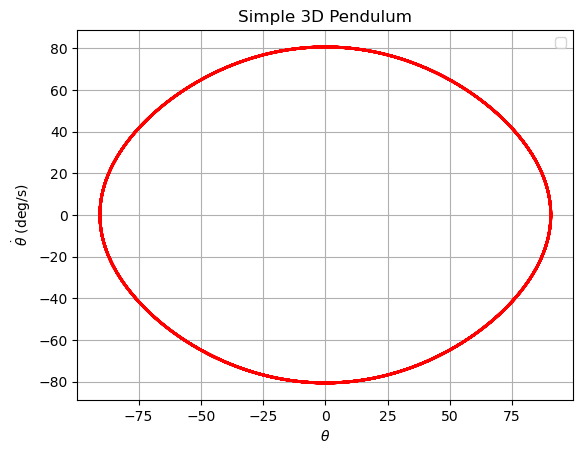

In [52]:
plt.plot(theta_deg,  ans2.T[2]*180/np.pi, 'r', lw=2)#, label=r'$\ddot \theta$')
# plt.plot(t, ans.T[3]*180/np.pi, 'b', lw=2, label=r'$\ddot \phi$') 
plt.title('Simple 3D Pendulum')
plt.legend()
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\dot \theta$ (deg/s)')
plt.grid()
plt.show()

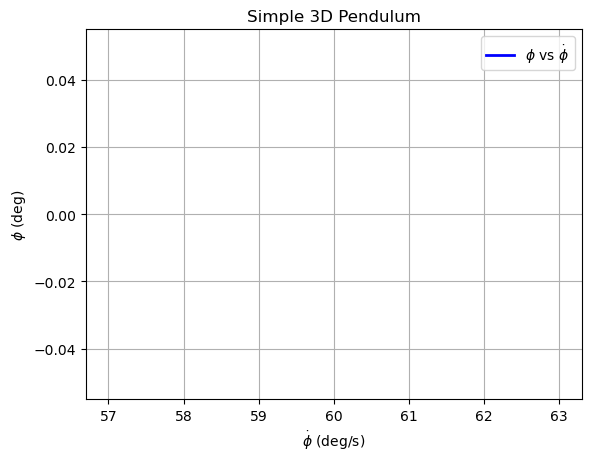

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
plt.plot(phi_deg,  ans2.T[3]*180/np.pi, 'b', lw=2, label=r'$\phi$ vs $\dot \phi$')
# plt.plot(t, ans.T[3]*180/np.pi, 'b', lw=2, label=r'$\ddot \phi$') 
plt.title('Simple 3D Pendulum')
plt.legend()
plt.xlabel(r'$\dot \phi$ (deg/s)')
plt.ylabel(r'$\phi$ (deg)')
plt.grid()
plt.show()

In [34]:
theta = ans3.T[0]
phi = ans3.T[1]
theta_deg = np.rad2deg(ans3.T[0])
phi_deg = np.rad2deg(ans3.T[1])

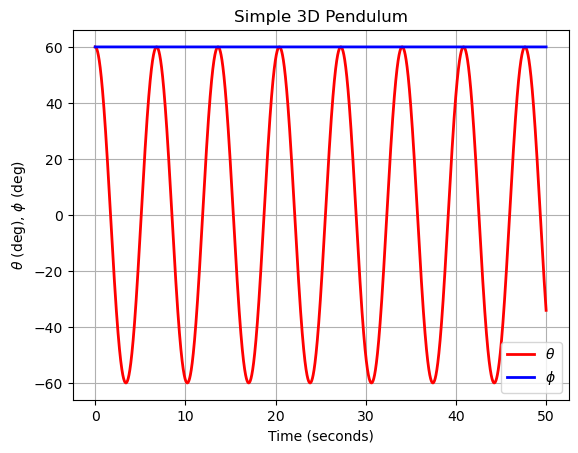

In [35]:
plt.plot(t,  theta_deg, 'r', lw=2, label=r'$\theta$')
plt.plot(t, phi_deg, 'b', lw=2, label=r'$ \phi$') 
plt.title('Simple 3D Pendulum')
plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel(r'$\theta$ (deg), $\phi$ (deg)')
plt.grid()
plt.show()

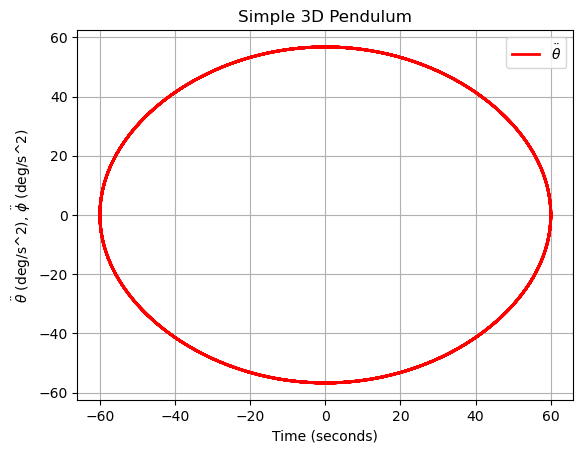

In [36]:
plt.plot(theta_deg,  ans3.T[2]*180/np.pi, 'r', lw=2, label=r'$\ddot \theta$')
# plt.plot(t, ans.T[3]*180/np.pi, 'b', lw=2, label=r'$\ddot \phi$') 
plt.title('Simple 3D Pendulum')
plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel(r'$\ddot \theta$ (deg/s^2), $\ddot \phi$ (deg/s^2)')
plt.grid()
plt.show()

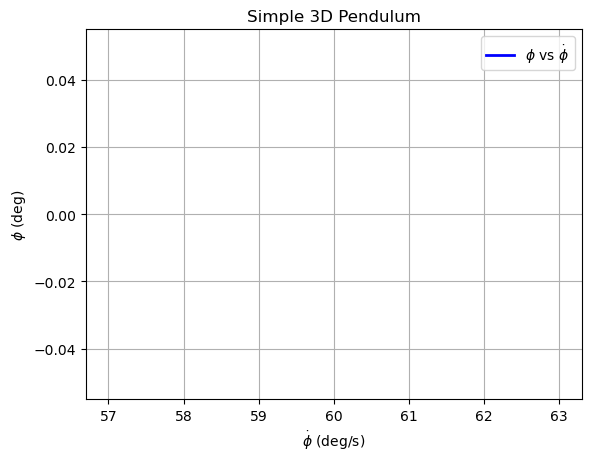

In [37]:
plt.plot(phi_deg,  ans3.T[3]*180/np.pi, 'b', lw=2, label=r'$\phi$ vs $\dot \phi$')
# plt.plot(t, ans.T[3]*180/np.pi, 'b', lw=2, label=r'$\ddot \phi$') 
plt.title('Simple 3D Pendulum')
plt.legend()
plt.xlabel(r'$\dot \phi$ (deg/s)')
plt.ylabel(r'$\phi$ (deg)')
plt.grid()
plt.show()

In [38]:
def get_pos(theta, phi, L1):
    return (x1_f(theta, phi, L1),
            y1_f(theta, phi, L1),
            z1_f(theta, phi, L1))

x1, y1, z1 = get_pos(ans.T[0], ans.T[1], L1)
np.save('./data/3Dpen', np.array([x1,y1,z1]))


In [39]:
x1, y1, z1 = get_pos(ans2.T[0], ans2.T[1], L1)
np.save('./data/3Dpen2', np.array([x1,y1,z1]))


In [40]:
x1, y1, z1 = get_pos(ans3.T[0], ans3.T[1], L1)
np.save('./data/3Dpen3', np.array([x1,y1,z1]))

FileNotFoundError: [WinError 2] The system cannot find the file specified

Error in callback <function _draw_all_if_interactive at 0x00000204A0D63380> (for post_execute), with arguments args (),kwargs {}:


AttributeError: 'list' object has no attribute 'set_data'

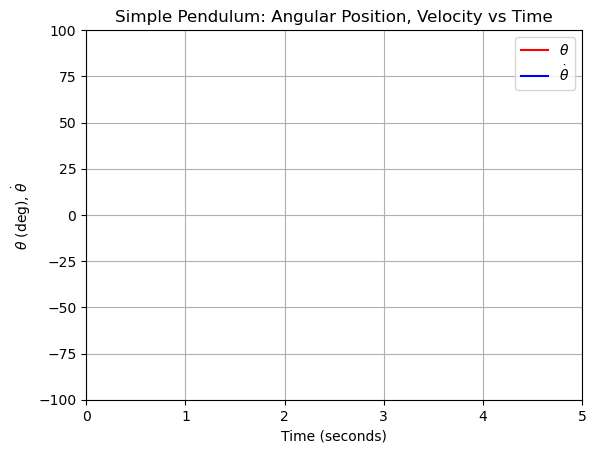

In [27]:
theta_deg = np.rad2deg(ans.T[0])
phi_deg = np.rad2deg(ans.T[1])

fig, ax = plt.subplots()

theta_curve = ax.plot(t[0], theta_deg[0], 'r')
phi_curve = ax.plot(t[0], phi_deg[0], 'b')

ax.set_title('Simple Pendulum: Angular Position, Velocity vs Time')
ax.set_xlim(0, 5)
ax.set_ylim(-100, 100)
ax.set_xlabel('Time (seconds)')
ax.set_ylabel(r'$\theta$ (deg), $\dot \theta$')
ax.legend([r'$\theta$', r'$\dot \theta$'])
ax.grid()

def animate(i):
    theta_curve.set_data(t[:i+1], theta_deg[:i+1])
    phi_curve.set_data(t[:i+1], phi_deg[:i+1])


ani = animation.FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = animation.FFMpegWriter(fps=30, extra_args=['-vcodec', 'libx264'])
ani.save('pend_animation.mp4', writer=ffmpeg_writer)

# Simulation

In [ ]:
g = 9.81
ell = 1

theta0 = np.deg2rad(30)
theta_dot0 = 0

phi0 = np.deg2rad(15)
phi_dot0 = 0

def pendulum_ODE(t, y):
    return (y[1], -g*np.sin(y[0])/ell)

sol = solve_ivp(pendulum_ODE, [0, 5], (theta0, theta_dot0),
    t_eval = np.linspace(0, 5, 30*5))

theta = sol.y[0]
theta_dot = sol.y[1]
t = sol.t

theta_deg = np.rad2deg(sol.y[0])
theta_dot_deg = np.rad2deg(sol.y[1])

np.savetxt('pend.csv', np.transpose([theta_deg, theta_dot_deg]), delimiter = ',')


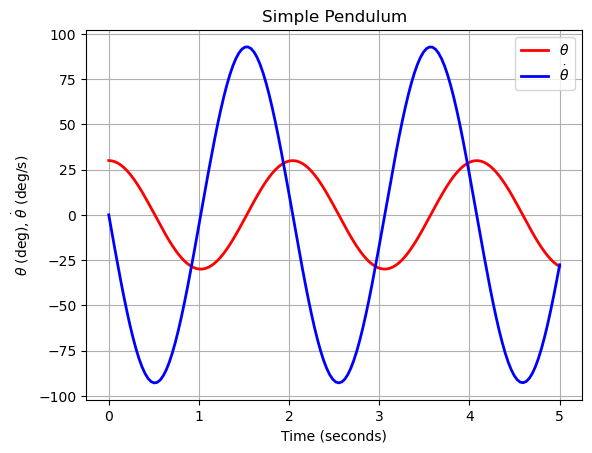

In [15]:
plt.plot(t, theta_deg, 'r', lw=2, label=r'$\theta$')
plt.plot(t, theta_dot_deg, 'b', lw=2, label=r'$\dot \theta$') 
plt.title('Simple Pendulum')
plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel(r'$\theta$ (deg), $\dot \theta$ (deg/s)')
plt.grid()
plt.show()

FileNotFoundError: [WinError 2] The system cannot find the file specified

Error in callback <function _draw_all_if_interactive at 0x0000024CB5EBEE80> (for post_execute), with arguments args (),kwargs {}:


AttributeError: 'list' object has no attribute 'set_data'

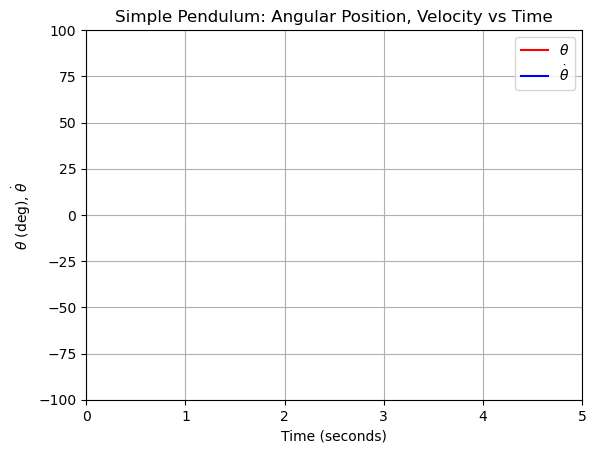

In [16]:
fig, ax = plt.subplots()

theta_curve = ax.plot(t[0], theta_deg[0], 'r')
theta_dot_curve = ax.plot(t[0], theta_dot_deg[0], 'b')

ax.set_title('Simple Pendulum: Angular Position, Velocity vs Time')
ax.set_xlim(0, 5)
ax.set_ylim(-100, 100)
ax.set_xlabel('Time (seconds)')
ax.set_ylabel(r'$\theta$ (deg), $\dot \theta$')
ax.legend([r'$\theta$', r'$\dot \theta$'])
ax.grid()

def animate(i):
    theta_curve.set_data(t[:i+1], theta_deg[:i+1])
    theta_dot_curve.set_data(t[:i+1], theta_dot_deg[:i+1])


ani = animation.FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = animation.FFMpegWriter(fps=30, extra_args=['-vcodec', 'libx264'])
ani.save('time_domain.mp4', writer=ffmpeg_writer)

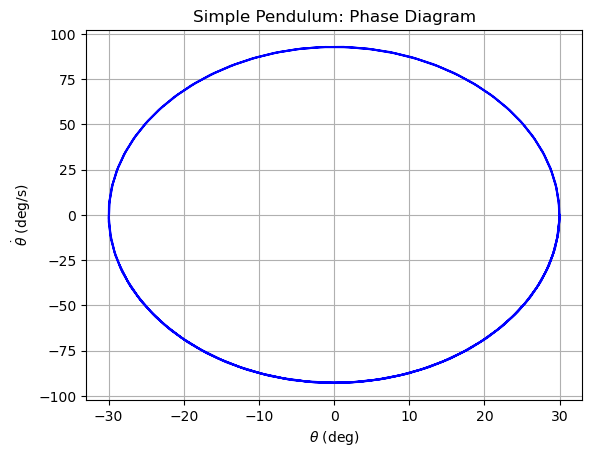

In [ ]:
plt.plot(theta_deg, theta_dot_deg, 'b')
plt.title('Simple Pendulum: Phase Diagram')
plt.xlabel(r'$\theta$ (deg)')   
plt.ylabel(r'$\dot \theta$ (deg/s)')
plt.grid()
plt.show()


TypeError: unsupported operand type(s) for *: 'int' and 'module'

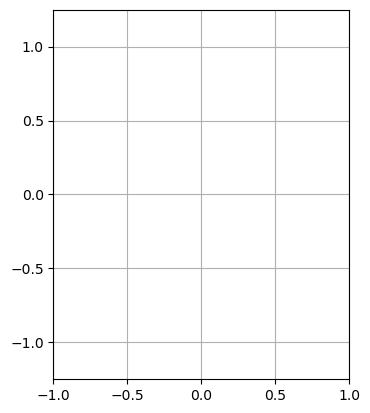

In [ ]:
def pend_pos(theta):
    return (ell*np.sin(theta), -ell*np*cos(theta))

fig = plt.figure()
ax = fig.add_subplot(aspect='equal')
ax.set_xlim(-1, 1)
ax.set_ylim(-1.25, 1.25)
ax.grid()

x0, y0 = pend_pos(theta0)
line, = ax.plot([0, x0], [0, y0], lw=2, c='k')
circle = ax.add_patch(plt.Circle(pend_pos(theta0), 0.05, fc='r', zorder=3))

def animate(i):
    x,y = pend_pos(theta[i])
    line.set_data([0, x], [0, y])
    circle.set_center((x, y))

 
ani = animation.FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = animation.FFMpegWriter(fps=30)
ani.save('pend.gif', writer=ffmpeg_writer)

damping forces friction potential 
physical pendulum 
6dof robot manipulator

recursive algorithms 
n - E 
lagrangian 
hamiltonian
double link pendulum 


kane's 
bobkov
anderson
featherstone's 6d



physical  single link 

math double 
phys double link 

odin's paper 
recursive n-e